In [1]:
# import libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

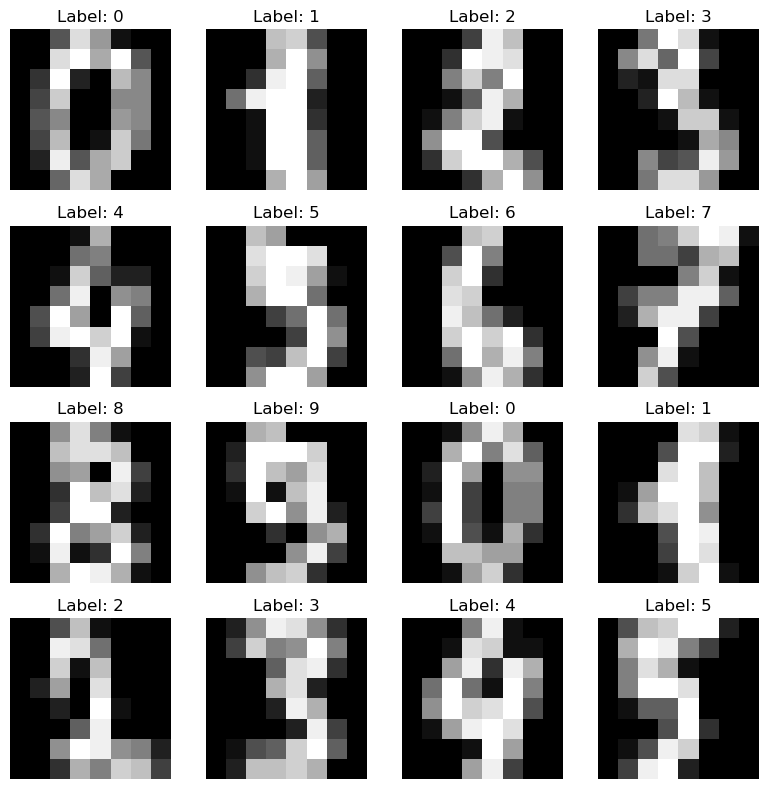

In [2]:
# load the dataset
digits = load_digits()

# visualize the dataset (print some sample images)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Using sigmoid function as activation function

In [3]:
# extract the features and labels
X = digits.data
y = digits.target

# creating training and test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the dataset features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # forward propagation
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.sigmoid(self.z2)
        return self.probs

    # backpropagation
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]

        # calculate gradients
        dZ2 = self.probs - y
        dW2 = (1 / m) * np.dot(self.a1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        # update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # forward and backward propagation
            self.forward(X)
            self.backward(X, y, learning_rate)

            # calculate and print the loss
            if epoch % 100 == 0:
                loss = self.calculate_loss(X, y)
                print(f'Epoch {epoch}: Loss {loss}')

    def calculate_loss(self, X, y):
        m = X.shape[0]
        loss = np.sum((self.probs - y) ** 2) / (2 * m)
        return loss

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

# applying one hot encoding to targets
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

def train_and_evaluate_model(learning_rate, epochs):
    num_classes = 10
    y_train_encoded = one_hot_encode(y_train, num_classes).astype(int)
    y_test_encoded = one_hot_encode(y_test, num_classes).astype(int)

    # initialize and train the neural network
    input_size = X_train.shape[1]
    hidden_size = 30
    output_size = num_classes

    model = NeuralNetwork(input_size, hidden_size, output_size)
    model.train(X_train, y_train_encoded, epochs=epochs, learning_rate=learning_rate)

    # evaluate the model on the test set
    y_pred = model.predict(X_test)

    # calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # calculate mse
    mse = np.mean((y_pred - y_test) ** 2)

    return accuracy, mse

# test with different learning rates and epochs
learning_rates = [0.01, 0.05, 0.1]
epochs_list = [500, 1000, 1500]

for lr in learning_rates:
    for epochs in epochs_list:
        acc, mse = train_and_evaluate_model(lr, epochs)
        print(f'Test Accuracy with LR={lr} and Epochs={epochs}: {acc}, MSE: {mse}')

Epoch 0: Loss 1.2857095892906343
Epoch 100: Loss 0.7913370141219627
Epoch 200: Loss 0.6432962252727965
Epoch 300: Loss 0.5740613339735923
Epoch 400: Loss 0.5293623718162045
Test Accuracy with LR=0.01 and Epochs=500: 0.23055555555555557, MSE: 13.33611111111111
Epoch 0: Loss 1.935188366514842
Epoch 100: Loss 0.9006823209107478
Epoch 200: Loss 0.6341520238577586
Epoch 300: Loss 0.5469380328503165
Epoch 400: Loss 0.4991469699229747
Epoch 500: Loss 0.46370233508117115
Epoch 600: Loss 0.4337192109176069
Epoch 700: Loss 0.4071921648164463
Epoch 800: Loss 0.38346252640199685
Epoch 900: Loss 0.362194857340903
Test Accuracy with LR=0.01 and Epochs=1000: 0.49444444444444446, MSE: 9.722222222222221
Epoch 0: Loss 2.0677792946854807
Epoch 100: Loss 0.8575906957925863
Epoch 200: Loss 0.6027693776381046
Epoch 300: Loss 0.5156826920028043
Epoch 400: Loss 0.4677387079373339
Epoch 500: Loss 0.4334366331589582
Epoch 600: Loss 0.4056884755575949
Epoch 700: Loss 0.38199077719820085
Epoch 800: Loss 0.3612453

# Using ReLU function as activation function

In [4]:
# extract the features and labels
X = digits.data
y = digits.target

# creating training and test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the dataset features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def relu(self, x):
        return np.maximum(0, x)

    # forward propagation
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.relu(self.z2)
        return self.output

    # backpropagation pass
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]

        # calculate gradients
        dZ2 = self.output - y
        dW2 = (1 / m) * np.dot(self.a1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 > 0)
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        # update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # forward and backward propagation
            self.forward(X)
            self.backward(X, y, learning_rate)

            # calculate and print the loss
            if epoch % 100 == 0:
                loss = self.calculate_loss(X, y)
                print(f'Epoch {epoch}: Loss {loss}')

    def calculate_loss(self, X, y):
        m = X.shape[0]
        loss = np.sum((self.output - y) ** 2) / (2 * m)
        return loss

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# applying one hot encoding to targets
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

def train_and_evaluate_model(learning_rate, epochs):
    num_classes = 10
    y_train_encoded = one_hot_encode(y_train, num_classes).astype(int)
    y_test_encoded = one_hot_encode(y_test, num_classes).astype(int)

    # initialize and train the neural network
    input_size = X_train.shape[1]
    hidden_size = 30
    output_size = num_classes

    model = NeuralNetwork(input_size, hidden_size, output_size)
    model.train(X_train, y_train_encoded, epochs=epochs, learning_rate=learning_rate)

    # evaluate the model on the test set
    y_pred = model.predict(X_test)

    # calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # calculate mse
    mse = np.mean((y_pred - y_test) ** 2)

    return accuracy, mse

# test with different learning rates and epochs
learning_rates = [0.01, 0.05, 0.1]
epochs_list = [500, 1000, 1500]

for lr in learning_rates:
    for epochs in epochs_list:
        acc, mse = train_and_evaluate_model(lr, epochs)
        print(f'Test Accuracy with LR={lr} and Epochs={epochs}: {acc}, MSE: {mse}')


Epoch 0: Loss 2377.9911782234926
Epoch 100: Loss 2.420101556958201
Epoch 200: Loss 1.8821989566119657
Epoch 300: Loss 1.544630780853313
Epoch 400: Loss 1.3124264934037495
Test Accuracy with LR=0.01 and Epochs=500: 0.3333333333333333, MSE: 20.76388888888889
Epoch 0: Loss 2180.907646605701
Epoch 100: Loss 2.4375699043816765
Epoch 200: Loss 1.8860151234896407
Epoch 300: Loss 1.504704825937911
Epoch 400: Loss 1.2677802540282184
Epoch 500: Loss 1.130207654209413
Epoch 600: Loss 1.0300297313184652
Epoch 700: Loss 0.9390439163981595
Epoch 800: Loss 0.8624966803386042
Epoch 900: Loss 0.7950053937809276
Test Accuracy with LR=0.01 and Epochs=1000: 0.49444444444444446, MSE: 14.644444444444444
Epoch 0: Loss 1436.8412297971747
Epoch 100: Loss 2.482283043613284
Epoch 200: Loss 1.837319704893483
Epoch 300: Loss 1.439029283385576
Epoch 400: Loss 1.2006916557319707
Epoch 500: Loss 1.0458474436564935
Epoch 600: Loss 0.9311327217123303
Epoch 700: Loss 0.8389130240069465
Epoch 800: Loss 0.761174781525022


# Using tanh function as activation function

In [5]:
# extract the features and labels
X = digits.data
y = digits.target

# creating training and test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the dataset features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def tanh(self, x):
        return np.tanh(x)

    # forward propagation
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    # backpropagation pass
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]

        dZ2 = self.z2 - y
        dW2 = (1 / m) * np.dot(self.a1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = np.dot(dZ2, self.W2.T) * (1 - np.power(self.a1, 2))
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        # update weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # forward propagation
            self.forward(X)

            # backpropagation
            self.backward(X, y, learning_rate)

            # calculate and print the loss
            if epoch % 100 == 0:
                loss = self.calculate_loss(X, y)
                print(f'Epoch {epoch}: Loss {loss}')

    def calculate_loss(self, X, y):
        m = X.shape[0]
        loss = np.sum(np.square(self.z2 - y)) / (2 * m)
        return loss

    def predict(self, X):
        logits = self.forward(X)
        return np.argmax(logits, axis=1)

# applying one hot encoding to targets
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

def test_model(learning_rate, epochs):
    num_classes = 10
    y_train_encoded = one_hot_encode(y_train, num_classes).astype(int)
    y_test_encoded = one_hot_encode(y_test, num_classes).astype(int)

    # initialize and train the neural network
    input_size = X_train.shape[1]
    hidden_size = 30
    output_size = num_classes

    model = NeuralNetwork(input_size, hidden_size, output_size)
    model.train(X_train, y_train_encoded, epochs=epochs, learning_rate=learning_rate)

    # evaluate the model on the test set
    y_pred = model.predict(X_test)

    # calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # calculate mse
    mse = np.mean((y_pred - y_test) ** 2)

    return accuracy, mse

# test with different learning rates and epochs
learning_rates = [0.01, 0.05, 0.1]
epochs_list = [500, 1000, 1500]

for lr in learning_rates:
    for epochs in epochs_list:
        acc, mse = test_model(lr, epochs)
        print(f'Test Accuracy with LR={lr} and Epochs={epochs}: {acc}, MSE: {mse}')


Epoch 0: Loss 131.50180314066372
Epoch 100: Loss 17.474920358116748
Epoch 200: Loss 8.039602718986353
Epoch 300: Loss 4.515868651074103
Epoch 400: Loss 2.778017109849583
Test Accuracy with LR=0.01 and Epochs=500: 0.29444444444444445, MSE: 11.23611111111111
Epoch 0: Loss 115.61274482626264
Epoch 100: Loss 18.32631099001602
Epoch 200: Loss 8.806871701006731
Epoch 300: Loss 5.017100254615805
Epoch 400: Loss 3.0909688392112216
Epoch 500: Loss 2.012024808772038
Epoch 600: Loss 1.3730848139690293
Epoch 700: Loss 0.9806135159115883
Epoch 800: Loss 0.7331559616560207
Epoch 900: Loss 0.573973975229727
Test Accuracy with LR=0.01 and Epochs=1000: 0.6055555555555555, MSE: 8.716666666666667
Epoch 0: Loss 119.10445486562081
Epoch 100: Loss 17.644296891097135
Epoch 200: Loss 8.29326627548494
Epoch 300: Loss 4.658313325309511
Epoch 400: Loss 2.8432156703282527
Epoch 500: Loss 1.8408476169130927
Epoch 600: Loss 1.2537848157162728
Epoch 700: Loss 0.8965643274805761
Epoch 800: Loss 0.6731796137829035
Epo